<a href="https://colab.research.google.com/github/viswakiranvvs/VAID_dataset/blob/master/preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#mounting google drive
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing required packages
import glob
import os
import xml.etree.ElementTree as ET
from google.colab.patches import cv2_imshow
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image, ImageEnhance
import tensorflow
import keras
import os
import glob
from skimage import io
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import expand_dims
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
# from keras.preprocessing.image import load_img
# from keras.preprocessing.image import img_to_array
# from keras.preprocessing.image import ImageDataGenerator

In [ ]:

#Function to generate new images
st_image=5986
def preprocess(path,filename):
  global st_image
  x_width=1137
  y_height=640
  f='/content/drive/MyDrive/Mini_project/VAID_dataset/JPEGImages/'+path
  new='/content/drive/MyDrive/Mini_project/generated_images/'

  tree=ET.parse(filename)
  root=tree.getroot()

  #code to change brightness of image
  im = Image.open(f)
  enhancer = ImageEnhance.Brightness(im)
  factor = 0.4 #soften the image
  im_output1 = enhancer.enhance(factor)
  im_output1.save(new+str(st_image)+'.jpg')
  tree.write('/content/drive/MyDrive/Mini_project/generated_annotations/'+str(st_image)+'.xml')
  text1=open('/content/drive/MyDrive/Mini_project/generated_images/'+str(st_image)+'.txt','w')
  st_image+=1


  #code to convert image into grayscale
  image=cv2.imread(f)
  grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  cv2.imwrite(new+str(st_image)+'.jpg',grayscale)
  tree.write('/content/drive/MyDrive/Mini_project/generated_annotations/'+str(st_image)+'.xml')
  text2=open('/content/drive/MyDrive/Mini_project/generated_images/'+str(st_image)+'.txt','w')
  st_image+=1

  #code to flip the image vertically
  image=io.imread(f)
  flipped=cv2.flip(image,-1)
  cv2.imwrite(new+str(st_image)+'.jpg',flipped)
  text3=open('/content/drive/MyDrive/Mini_project/generated_images/'+str(st_image)+'.txt','w')
  for c in root.findall('object'):
    at=c.attrib
    clas=int(c.find('name').text)
    t=c.find('bndbox')
    xmin=int(t.find('xmin').text)
    xmax=int(t.find('xmax').text)
    ymin=int(t.find('ymin').text)
    ymax=int(t.find('ymax').text)
    x_centre=((xmax+xmin)/2)/x_width
    y_centre=((ymax+ymin)/2)/y_height
    w=(xmax-xmin)/x_width
    h=(ymax-ymin)/y_height
    new_str=str(clas)+' '+str(x_centre)+' '+str(y_centre)+' '+str(w)+' '+str(h)+'\n'
    text1.writelines(new_str)
    text2.writelines(new_str)
    xmin_new=x_width-xmin
    xmax_new=x_width-xmax
    x_centre=((xmax_new+xmin_new)/2)/x_width
    new_str=str(clas)+' '+str(x_centre)+' '+str(y_centre)+' '+str(w)+' '+str(h)+'\n'
    text3.writelines(new_str)
    t.find('xmin').text=str(xmin_new)
    t.find('xmax').text=str(xmax_new)
  text1.close()
  text2.close()
  text3.close()
  #generating new xml files
  tree.write('/content/drive/MyDrive/Mini_project/generated_annotations/'+str(st_image)+'.xml')
  st_image+=1

In [ ]:


st_image

5986

In [ ]:
#preprocess('005769.jpg','/content/drive/MyDrive/Mini project/VAID_dataset/Annotations/005769.xml')

In [ ]:
path = '/content/drive/MyDrive/Mini_project/VAID_dataset/Annotations/'
count=0
files=0
class_6=0
for filename in glob.glob(os.path.join(path, '*.xml')):
  tree=ET.parse(filename)
  root=tree.getroot()
  files+=1
  for c in root.findall('object'):
    at=c.attrib
    clas=int(c.find('name').text)
    if clas==6:
      count+=1
      if count%5==0:
        class_6+=3
        temp=filename.split('/')
        f=temp[7].split('.')
        img_path=f[0]+'.jpg'
        preprocess(img_path,filename)
        print(img_path)
        #print(img_path)

005769.jpg
005771.jpg
005781.jpg
005974.jpg
005892.jpg
005905.jpg
005903.jpg
005913.jpg
005908.jpg
005779.jpg
004829.jpg
004841.jpg
004834.jpg
004848.jpg
004986.jpg
004992.jpg
005045.jpg
004998.jpg
005041.jpg
005036.jpg
005030.jpg
004990.jpg
005158.jpg
005150.jpg
005489.jpg
003879.jpg
003887.jpg
003882.jpg
003728.jpg
003735.jpg
004800.jpg
004815.jpg
004812.jpg
004811.jpg
004814.jpg
002564.jpg
002598.jpg
002602.jpg


In [ ]:
path = '/content/drive/MyDrive/Mini_project/VAID_dataset/Annotations/'
count=0
files=0
class_2=0
for filename in glob.glob(os.path.join(path, '*.xml')):
  tree=ET.parse(filename)
  root=tree.getroot()
  files+=1
  for c in root.findall('object'):
    at=c.attrib
    clas=int(c.find('name').text)
    if clas==2:
      count+=1
      if count%7==0:
        class_2+=3
        temp=filename.split('/')
        f=temp[7].split('.')
        img_path=f[0]+'.jpg'
        preprocess(img_path,filename)
        print(img_path)
        #print(img_path)

In [ ]:
path = '/content/drive/MyDrive/Mini project/VAID_dataset/Annotations/'
count=0
files=0
class_5=0
for filename in glob.glob(os.path.join(path, '*.xml')):
  tree=ET.parse(filename)
  root=tree.getroot()
  files+=1
  for c in root.findall('object'):
    at=c.attrib
    clas=int(c.find('name').text)
    if clas==5:
      count+=1
      if count%5==0:
        class_5+=3
        temp=filename.split('/')
        f=temp[7].split('.')
        img_path=f[0]+'.jpg'
        preprocess(img_path,filename)
        print(img_path)
        #print(img_path)

In [ ]:
print('class 2 generated images: '+str(class_2))
print('class 5 generated images: '+str(class_5))
print('class 6 generated images: '+str(class_6))
print('Total annotated images: '+str(class_2+class_5+class_6))

class 2 generated images: 0
class 5 generated images: 0
class 6 generated images: 0
Total annotated images: 0


In [ ]:
r=cv2.imread('/content/drive/MyDrive/Mini_project/VAID_dataset/JPEGImages/000950.jpg')

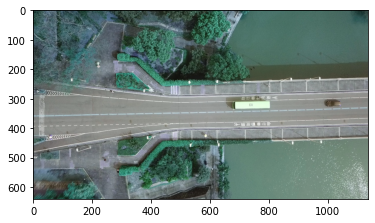

In [ ]:
plt.imshow(r)

*   class 1: 40330  Sedan
*   class 2: 501    Mini bus
*   class 3: 3187   Truck
*   class 4: 3011   Pickup Truck
*   class 5: 580    Bus
*   class 6: 191    Cement Truck
*   class 7: 804    Trailer

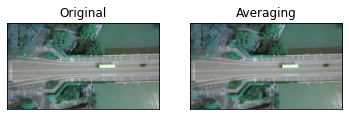

In [ ]:
  img = cv.imread('/content/drive/MyDrive/Mini_project/VAID_dataset/JPEGImages/000950.jpg')
  kernel = np.ones((5,5),np.float32)/25
  dst = cv.filter2D(img,-1,kernel)
  plt.subplot(121),plt.imshow(img),plt.title('Original')
  plt.xticks([]), plt.yticks([])
  plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
  plt.xticks([]), plt.yticks([])
  plt.show()

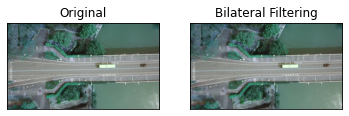

In [ ]:
img = cv.imread('/content/drive/MyDrive/Mini_project/VAID_dataset/JPEGImages/000950.jpg')
blur = cv.bilateralFilter(img,9,75,75)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Bilateral Filtering')
plt.xticks([]), plt.yticks([])
plt.show()
